In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Plot comparative stimulus 

In [7]:
def plotting(filename):
    filename.columns = ['Block',' Trial','f1(Hz)','ISI_1','f2(Hz)','ISI_2','decision','decision_time','ISI_3']
    df=filename.copy()
    conditionlist=[
        (file_path['f1(Hz)']>15)&(file_path['decision']=='before'),
        (file_path['f1(Hz)']<15)&(file_path['decision']=='before'),
        (file_path['f2(Hz)']>15)&(file_path['decision']=='after'),
        (file_path['f2(Hz)']<15)&(file_path['decision']=='after')]
    choicelist=[1,1,1,1]
    df['score']=np.select(conditionlist, choicelist)
    f1=df[df['f1(Hz)']!=15].groupby(df['f1(Hz)'])['score'].sum()
    f2=df[df['f2(Hz)']!=15].groupby(df['f2(Hz)'])['score'].sum()

    merge= pd.merge(f1,f2, how='outer', left_on=f1.index, right_on=f2.index)
    merge['score']=(merge['score_x']+merge['score_y'])/10
    del merge['score_x']
    del merge['score_y']
    merge.columns=['Hz','score']
    plt.figure(figsize=(8, 5))
    plt.scatter(x="Hz", y="score", data=merge)
    newstr = i.replace("_Dis.txt", "")
    plt.title('{}'.format(newstr))
    plt.xlabel("Frequency(Hz)")
    plt.ylabel("proportion 'higher' responses")
    plt.grid()

<ipython-input-7-b01b4e9cdfcc>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 5))


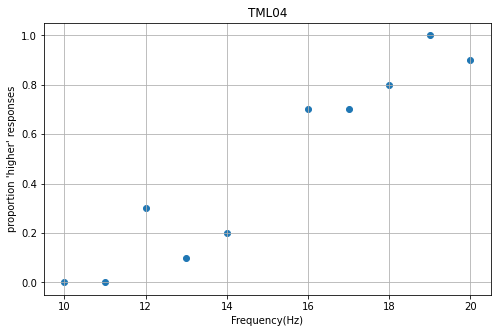

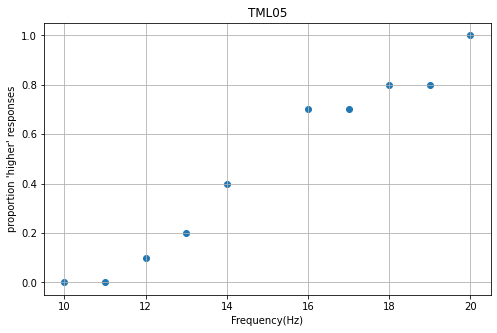

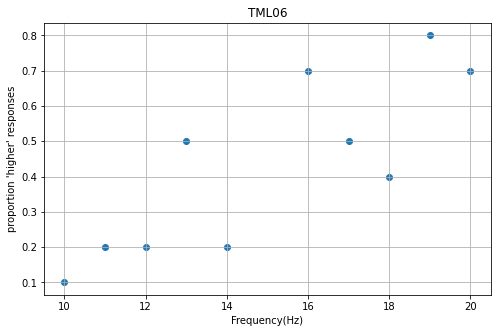

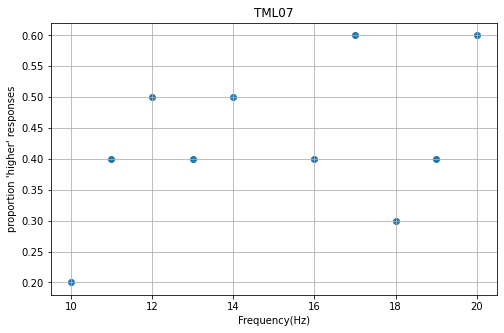

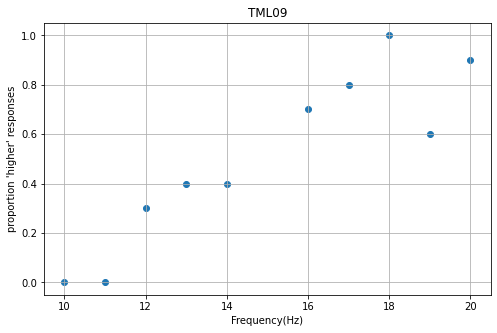

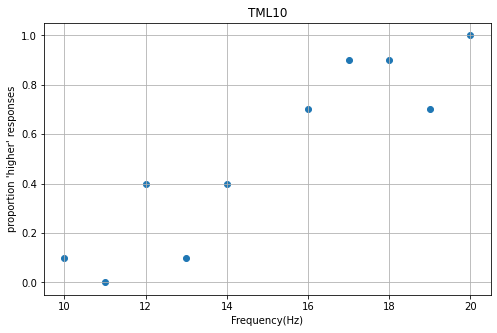

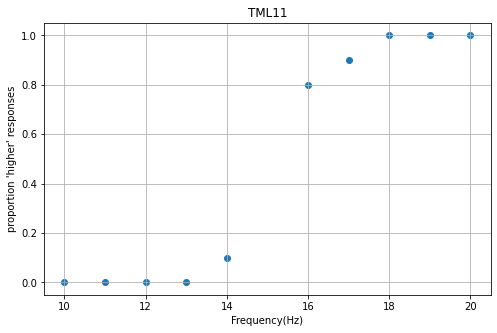

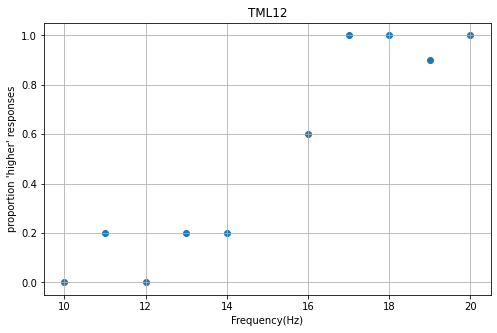

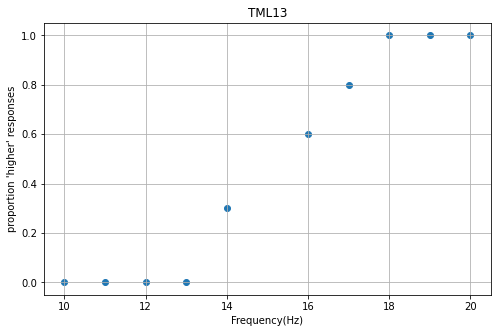

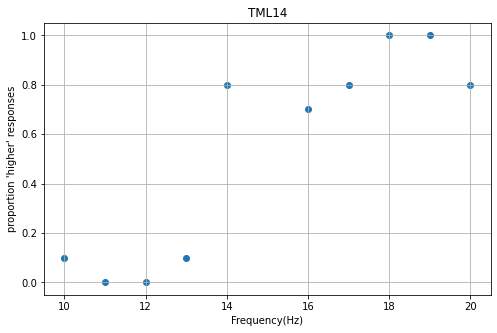

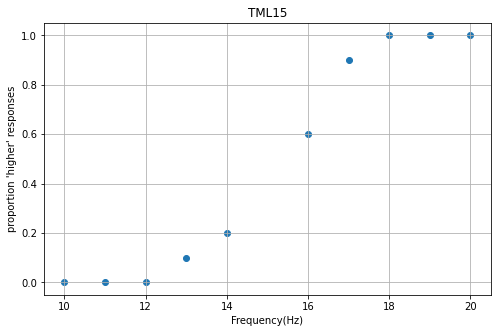

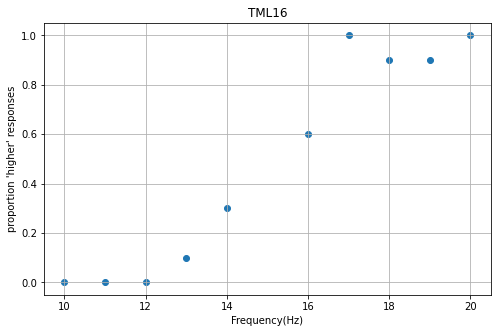

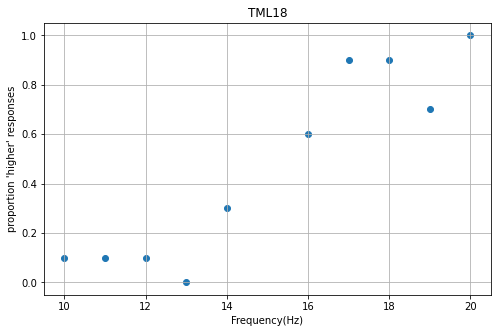

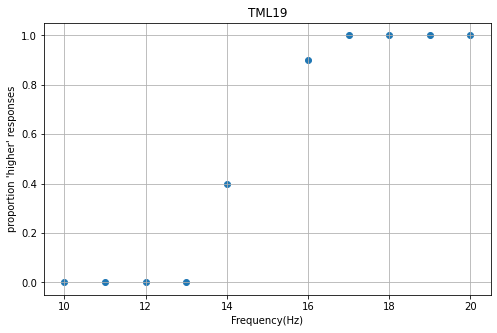

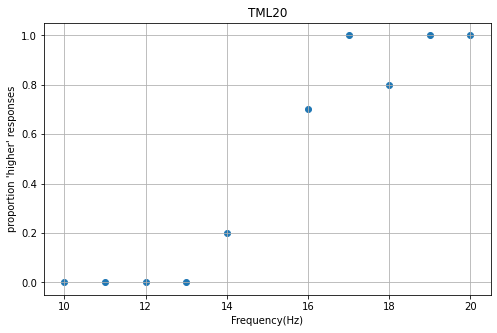

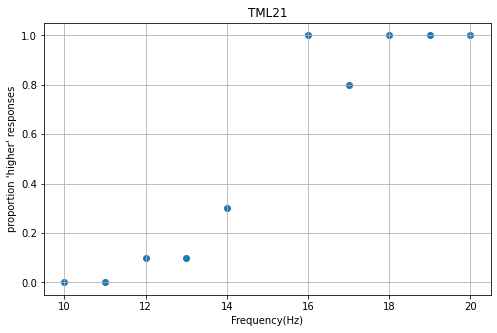

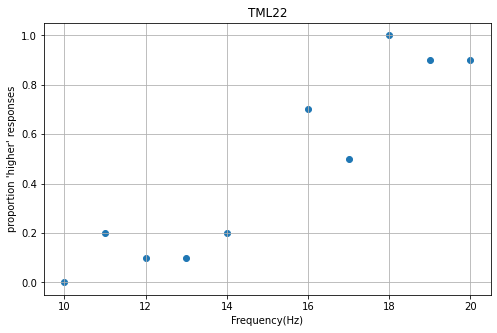

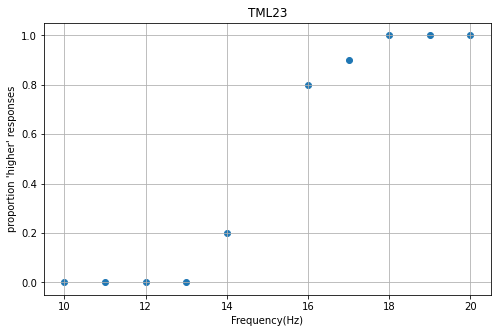

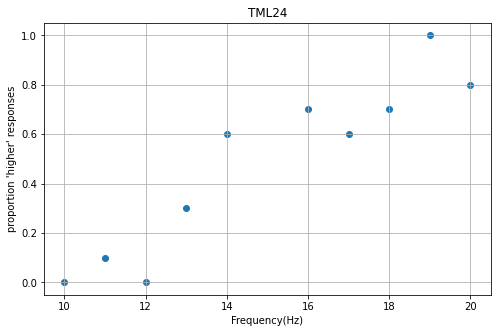

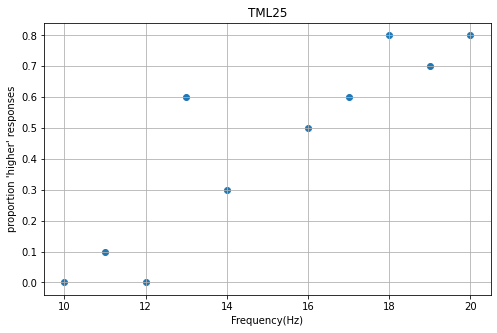

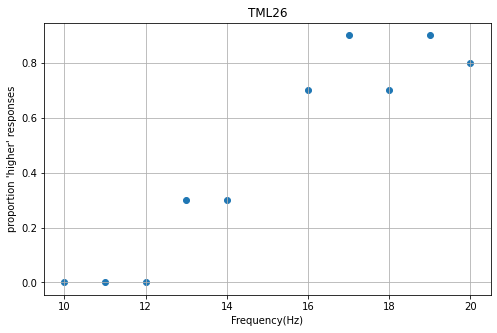

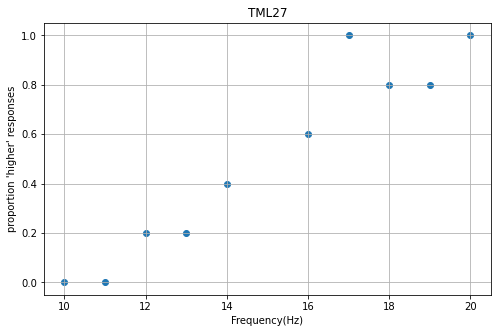

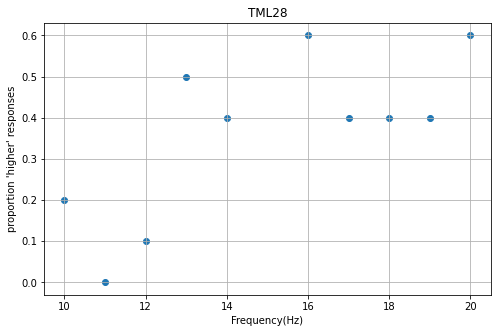

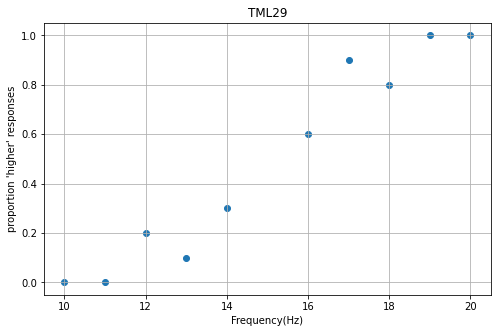

In [11]:
filelist=os.listdir('./TM')
for i in filelist:
    file_path = pd.read_csv('./TM/{}'.format(i), sep='\t', index_col=False, header=None)
    plotting(file_path)

# Contour line for X^2

In [15]:
filename = pd.read_csv('./TM/TML16_Dis.txt', sep='\t', index_col=False, header=None)
filename.columns = ['Block',' Trial','f1(Hz)','ISI_1','f2(Hz)','ISI_2','decision','decision_time','ISI_3']
df=filename.copy()
conditionlist=[
    (file_path['f1(Hz)']>15)&(file_path['decision']=='before'),
    (file_path['f1(Hz)']<15)&(file_path['decision']=='before'),
    (file_path['f2(Hz)']>15)&(file_path['decision']=='after'),
    (file_path['f2(Hz)']<15)&(file_path['decision']=='after')]
choicelist=[1,1,1,1]
df['score']=np.select(conditionlist, choicelist)
f1=df[df['f1(Hz)']!=15].groupby(df['f1(Hz)'])['score'].sum()
f2=df[df['f2(Hz)']!=15].groupby(df['f2(Hz)'])['score'].sum()
merge= pd.merge(f1,f2, how='outer', left_on=f1.index, right_on=f2.index)
merge['score']=(merge['score_x']+merge['score_y'])/10
del merge['score_x']
del merge['score_y']
merge.columns=['Hz','score']
df

,Block,Trial,f1(Hz),ISI_1,f2(Hz),ISI_2,decision,decision_time,ISI_3,score
0,1,1,15.0,4.5,13.0,5,after,0.457,3,0
1,1,2,15.0,4.5,18.0,5,before,0.420,3,1
2,1,3,15.0,6.5,14.0,3,before,0.400,5,1
3,1,4,15.0,4.5,10.0,5,before,0.436,3,0
4,1,5,19.0,6.5,15.0,3,after,0.055,5,0
...,...,...,...,...,...,...,...,...,...,...
95,10,6,15.0,6.5,11.0,3,before,0.371,5,0
96,10,7,15.0,3.5,17.0,6,after,0.439,2,1
97,10,8,12.0,6.5,15.0,3,after,0.522,5,1
98,10,9,18.0,7.5,15.0,2,before,0.638,6,1


In [79]:
def f(a,b,y):
    x=-15
    g=0.5
    if x<0:
        y=g*exp(-a(-x)**b)    
    elif x==0:
        y=g
    elif x>0:
        y=1-(1-g)*exp(-a*x**b)